In [74]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0-dev20240704


In [75]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2024-07-05 08:34:11--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv.2’

train-data.tsv.2    100%[===================>] 349.84K  --.-KB/s    in 0.04s   

2024-07-05 08:34:11 (8.13 MB/s) - ‘train-data.tsv.2’ saved [358233/358233]

--2024-07-05 08:34:11--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv.2’

valid-data.tsv.2    100%[========

In [76]:
# Print the file path for verification (optional)
print(f"Reading data from: {train_file_path}")

try:
  # Read the TSV data using pandas
  train_ = pd.read_csv(train_file_path, sep="\t", names=['class', 'sms'])
  print("Data read successfully!")
except FileNotFoundError:
  print(f"Error: File not found at {train_file_path}")

Reading data from: train-data.tsv
Data read successfully!


In [77]:
print(train_.head())  # Print the first few rows of the data

  class                                                sms
0   ham  ahhhh...just woken up!had a bad dream about u ...
1   ham                           you can never do nothing
2   ham  now u sound like manky scouse boy steve,like! ...
3   ham  mum say we wan to go then go... then she can s...
4   ham  never y lei... i v lazy... got wat? dat day ü ...


In [78]:
# Now for the test one
print(f"Reading data from: {test_file_path}")

try:
  # Read the TSV data using pandas
  test_ = pd.read_csv(test_file_path, sep="\t", names=['class', 'sms'])
  print("Data read successfully!")
except FileNotFoundError:
  print(f"Error: File not found at {test_file_path}")

print(test_.head())

Reading data from: valid-data.tsv
Data read successfully!
  class                                                sms
0   ham  i am in hospital da. . i will return home in e...
1   ham         not much, just some textin'. how bout you?
2   ham  i probably won't eat at all today. i think i'm...
3   ham  don‘t give a flying monkeys wot they think and...
4   ham                                who are you seeing?


<Axes: xlabel='class'>

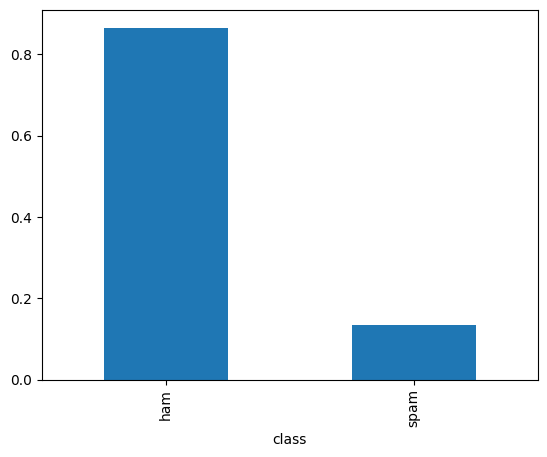

In [79]:
# check target balance

train_['class'].value_counts(normalize = True).plot.bar()


## PREPROCESSING

In [80]:
#PREPROCESSING TEXT
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import re

lemmatizer = WordNetLemmatizer()

def preprocessing(sms):

    words = word_tokenize(sms) #Tokenization
    #to Lowercase
    words = [word.lower() for word in words if word.isalnum()]
    #Remove Stopwords
    words = [word for word in words if word not in stopwords.words("english")]
    #Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
    preprocessed = ' '.join(words)

    return preprocessed # Return the preprocessed text as a string


#Apply
train_['sms'] = [preprocessing(text) for text in train_['sms']]
test_['sms'] = [preprocessing(text) for text in test_['sms']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
train_.head()

,class,sms
0,ham,ahhhh woken bad dream u tho dont like u right ...
1,ham,never nothing
2,ham,u sound like manky scouse boy steve like trave...
3,ham,mum say wan go go shun bian watch da glass exh...
4,ham,never lei v lazy got wat dat day ü send da url...


In [82]:
#Shuffle datasets
train_ = train_.sample(frac=1, random_state=42)
test_ = test_.sample(frac=1, random_state=42)

#SPLIT DATASETS IN X AND Y
x_train = train_['sms']
y_train = train_['class']

x_test = test_['sms']
y_test = test_['class']

print(x_test[:5])

1029                  point hangin mr right makin u happy
168     glad went well come 11 plenty time claire go work
1374            yes possible dint try pls dont tell one k
988     thats cool sometimes slow gentle sonetimes rou...
453     auction round highest bid next maximum bid bid...
Name: sms, dtype: object


## FEATURE EXTRACTION

In [83]:
# Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(x_train)

X_train_cv.shape

(4179, 6469)

In [84]:
# transform X_test using CV

X_test_cv = cv.transform(x_test)

## MODEL BUILDING AND TESTING

In [85]:
from sklearn.naive_bayes import MultinomialNB

# Build a Gaussian Classifier
model = MultinomialNB()

# Model training
model.fit(X_train_cv, y_train)

# Predict Output
to_predict = X_test_cv  #already preprocessed!!!!
  #Now predict
predicted = model.predict(to_predict)  #Expects 2D array

predicted_proba = model.predict_proba(to_predict)[0]

#print("Actual Value:", y_test[453])
#print("Predicted Value:", predicted[0])
print(predicted)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


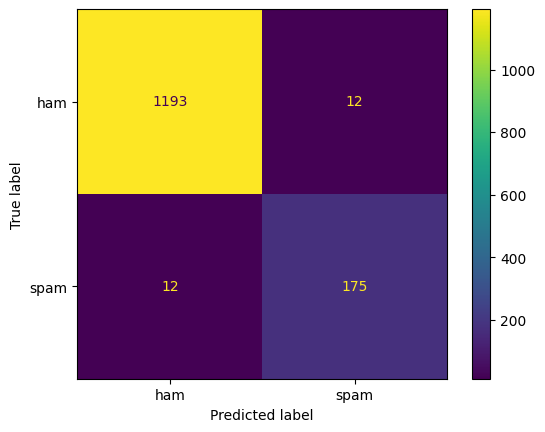

In [86]:
# confusion matrix

from sklearn import metrics

CM = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = ['ham', 'spam'])

cm_display.plot()
plt.show()

## NOW PREDICTING

In [87]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  # Preprocess the text
  processed_text = preprocessing(pred_text)

  # Convert the preprocessed text to a matrix given our 'bag of words'
  new_message = np.array([processed_text])  # Convert to a 2D array for prediction
  new_message_cv = cv.transform(new_message)  # Convert tomatrix

  # Predict the label and probability
  predicted_label = model.predict(new_message_cv)[0]
  predicted_proba = model.predict_proba(new_message_cv)[0]  # Probability for the predicted class

  return [predicted_proba[0], predicted_label]

# Test
text_ex = "How are you?."
prediction = predict_message(text_ex)
print(prediction)

[0.8659966499162478, 'ham']


In [88]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


You passed the challenge. Great job!
